## Лабораторная работа №8. Глазков Олег Игоревич

## Задание 1
Примените метод k-means для данных находящихся по ссылке. Постройте кластера для следующих комбинаций атрибутов:
* показатель BMI, возраст Age
* показатель BloodPressure, возраст Age. Пожалуйста, постройте визуализацию ваших результатов

### Импорт библиотек и датасета

In [23]:
# Инициализация необходимых библиотек
import numpy as np
import pandas as pd
import plotly.express as px
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Инициализация датасета
diabetes = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv')
print(diabetes.shape)
diabetes.head()

(768, 9)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [5]:
# Определение атрибутов для кластеризации
features_bmi_age = diabetes[['BMI', 'Age']].values
features_bp_age = diabetes[['BloodPressure', 'Age']].values

In [6]:
features_bmi_age

array([[33.6, 50. ],
       [26.6, 31. ],
       [23.3, 32. ],
       ...,
       [26.2, 30. ],
       [30.1, 47. ],
       [30.4, 23. ]])

In [7]:
# Масштабирование данных
scaler = StandardScaler()
scaled_features_bmi_age = scaler.fit_transform(features_bmi_age)
scaled_features_bp_age = scaler.fit_transform(features_bp_age)

In [8]:
scaled_features_bmi_age

array([[ 0.20401277,  1.4259954 ],
       [-0.68442195, -0.19067191],
       [-1.10325546, -0.10558415],
       ...,
       [-0.73518964, -0.27575966],
       [-0.24020459,  1.17073215],
       [-0.20212881, -0.87137393]])

In [9]:
# Количество кластеров
n_clusters = 3

In [20]:
# Создание и обучение моделей k-means для масштабированных данных
kmeans_bmi_age = KMeans(n_clusters=n_clusters, n_init=10, random_state=42).fit(scaled_features_bmi_age)
kmeans_bp_age = KMeans(n_clusters=n_clusters, n_init=10, random_state=42).fit(scaled_features_bp_age)

In [21]:
# Визуализация результатов с помощью plotly.express
fig_bmi_age = px.scatter(diabetes, x='BMI', y='Age', color='BMI',
                         title='Кластеры по показателю BMI и возрасту (с масштабированием)',
                         color_continuous_scale='viridis')
fig_bp_age = px.scatter(diabetes, x='BloodPressure', y='Age', color='BloodPressure',
                        title='Кластеры по показателю BloodPressure и возрасту (с масштабированием)',
                        color_continuous_scale='viridis')

In [22]:
# Отобразим графики
fig_bmi_age.show()
fig_bp_age.show()

## Задание 2
Примените метод иерархической кластеризации с выводом дендрограммы для тех же комбинаций атрибутов.

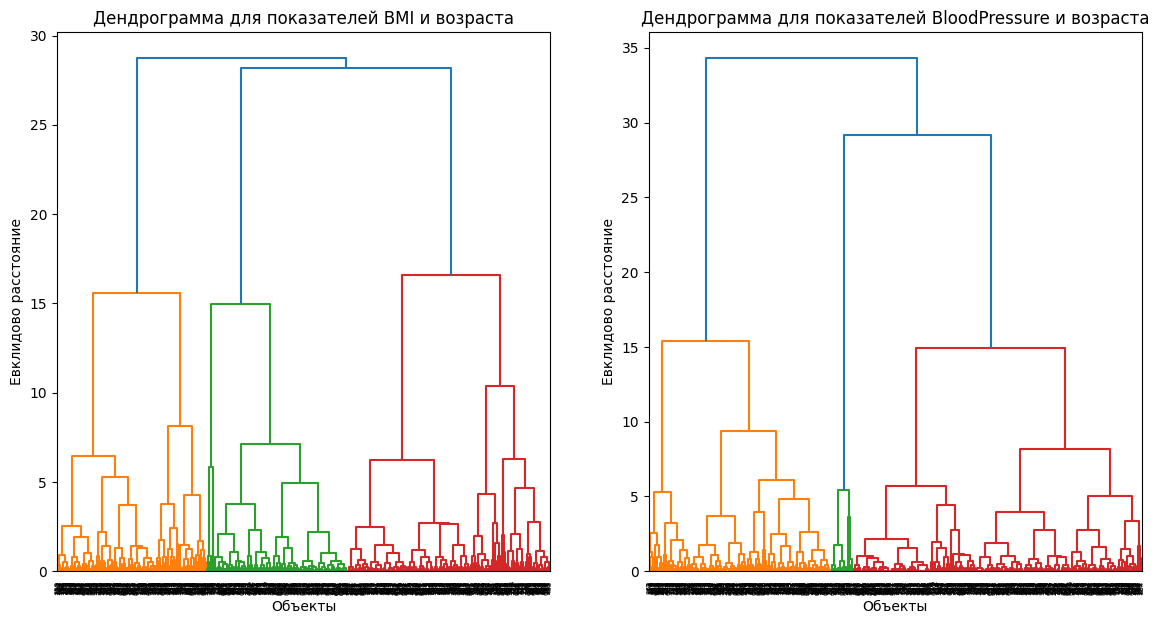

In [24]:
# Создадим размер фигуры
plt.figure(figsize=(14, 7))

# Иерархическая кластеризация для показателей BMI и возраста - метод Варда
plt.subplot(1, 2, 1)
dend_bmi_age = shc.dendrogram(shc.linkage(scaled_features_bmi_age, method='ward'))
plt.title('Дендрограмма для показателей BMI и возраста')
plt.xlabel('Объекты')
plt.ylabel('Евклидово расстояние')

# Иерархическая кластеризация для показателей BloodPressure и возраста - метод Варда
plt.subplot(1, 2, 2)
dend_bp_age = shc.dendrogram(shc.linkage(scaled_features_bp_age, method='ward'))
plt.title('Дендрограмма для показателей BloodPressure и возраста')
plt.xlabel('Объекты')
plt.ylabel('Евклидово расстояние')

plt.show()

На дендрограммах мы видим структуру кластеров на основе расстояний между объектами